## Desmatamento UF entre 2008 e 2018 - Amazônia Legal

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('terrabrasilis_amazon_9_8_2019_UF.csv', encoding='latin', delimiter=',')

In [3]:
df.head()

,time,area,uf
0,2018,23.667546,AMAPÃ
1,2018,92.761077,MARANHÃO
2,2018,461.248697,ACRE
3,2018,6.325568,TOCANTINS
4,2018,1363.312140,MATO GROSSO


In [4]:
df.tail()

,time,area,uf
94,2008,3111.590278,MATO GROSSO
95,2008,5636.554458,PARÃ
96,2008,665.308335,RORAIMA
97,2008,611.766834,AMAZONAS
98,2008,1085.314203,RONDÃNIA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
time    99 non-null int64
area    99 non-null float64
uf      99 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
list(df.columns)

['time', 'area', 'uf']

In [7]:
df.rename(columns={'time': 'Ano','area': 'Area_KM', 'uf': 'UF'}, inplace=True)

In [8]:
df.head()

,Ano,Area_KM,UF
0,2018,23.667546,AMAPÃ
1,2018,92.761077,MARANHÃO
2,2018,461.248697,ACRE
3,2018,6.325568,TOCANTINS
4,2018,1363.312140,MATO GROSSO


In [9]:
df['UF'].value_counts()

TOCANTINS      11
AMAPÃ         11
ACRE           11
AMAZONAS       11
MATO GROSSO    11
MARANHÃO      11
RONDÃNIA      11
PARÃ          11
RORAIMA        11
Name: UF, dtype: int64

In [10]:
df.UF.replace({'RONDÃNIA':'RONDONIA',
                     'MARANHÃO':'MARANHÃO',
              'PARÃ':'PARÁ',
              'AMAPÃ':'AMAPÁ'}, regex=True, inplace=True)

In [11]:
df['UF'].value_counts()

TOCANTINS      11
ACRE           11
AMAZONAS       11
MATO GROSSO    11
PARÁ           11
MARANHÃO       11
RONDONIA       11
AMAPÁ          11
RORAIMA        11
Name: UF, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,99.0,2013.000000,3.178371,2008.000000,2010.000000,2013.000000,2016.000000,2018.000000
Area_KM,99.0,705.213942,948.640209,6.325568,110.921617,344.140264,980.910237,5636.554458


## Total de Área Desmatada entre 2008 e 2018

In [13]:
AnosGroups = df.groupby("Ano")["Area_KM"].sum().reset_index()

In [14]:
AnosGroups.sort_values(by= "Ano", ascending=False)

,Ano,Area_KM
10,2018,7033.050227
9,2017,6670.987690
8,2016,7005.215500
7,2015,5813.516814
6,2014,4835.129455
5,2013,5088.613029
4,2012,4089.046482
3,2011,5327.573461
2,2010,5819.938902
1,2009,5845.610328


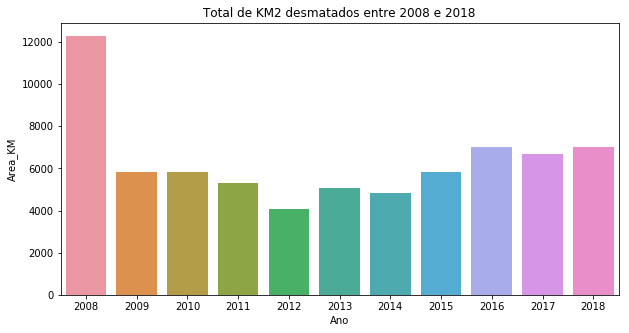

In [16]:
plt.figure(figsize=(10,5))
plt.title("Total de KM2 desmatados entre 2008 e 2018")
sns.barplot(x="Ano", y="Area_KM", data=AnosGroups);

In [17]:
# Total de KM2 desmatados em 5 anos
df['Area_KM'].sum()

69816.18028989933

## Total de Desmatamento por UF´s entre 2008 e 2018

In [18]:
EstadoGroups = df.groupby("UF")["Area_KM"].sum().reset_index()

In [19]:
EstadoGroups.sort_values(by= "Area_KM", ascending=False)

,UF,Area_KM
5,PARÁ,30871.726081
4,MATO GROSSO,13463.636592
6,RONDONIA,9776.094704
2,AMAZONAS,7269.468863
0,ACRE,3122.829620
3,MARANHÃO,2503.138849
7,RORAIMA,2215.978268
1,AMAPÁ,378.401435
8,TOCANTINS,214.905878


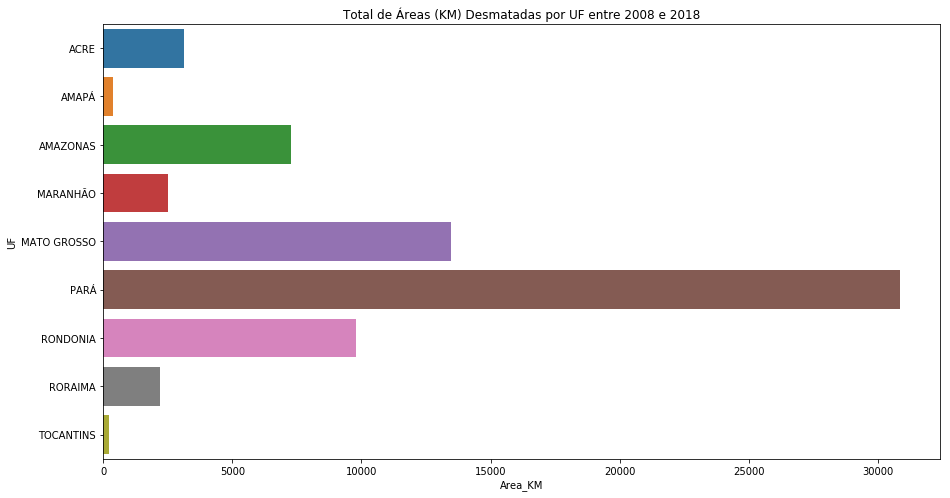

In [21]:
plt.figure(figsize=(15,8))
plt.title("Total de Áreas (KM) Desmatadas por UF entre 2008 e 2018")
sns.barplot(x="Area_KM", y="UF", data=EstadoGroups);

In [22]:
Para = df[df.UF == 'PARÁ']
Para

,Ano,Area_KM,UF
5,2018,2668.878526,PARÁ
14,2017,2563.645791,PARÁ
23,2016,2745.840793,PARÁ
32,2015,2281.543538,PARÁ
41,2014,1794.219138,PARÁ
50,2013,2097.586647,PARÁ
59,2012,1698.238383,PARÁ
68,2011,2510.116815,PARÁ
77,2010,3316.665072,PARÁ
86,2009,3558.436920,PARÁ


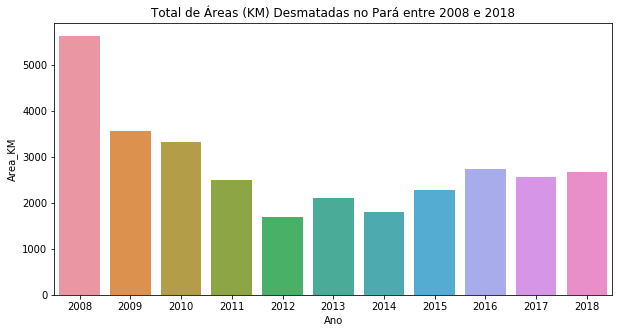

In [23]:
plt.figure(figsize=(10,5))
plt.title("Total de Áreas (KM) Desmatadas no Pará entre 2008 e 2018")
sns.barplot(x="Ano", y="Area_KM", data=Para);

In [24]:
MT = df[df.UF == 'MATO GROSSO']
MT

,Ano,Area_KM,UF
4,2018,1363.312140,MATO GROSSO
13,2017,1273.108232,MATO GROSSO
22,2016,1313.155413,MATO GROSSO
31,2015,1366.054959,MATO GROSSO
40,2014,1012.417066,MATO GROSSO
49,2013,1000.295825,MATO GROSSO
58,2012,703.994967,MATO GROSSO
67,2011,918.851584,MATO GROSSO
76,2010,681.179846,MATO GROSSO
85,2009,719.676281,MATO GROSSO


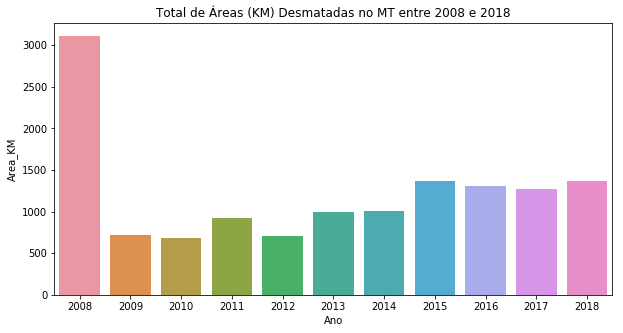

In [25]:
plt.figure(figsize=(10,5))
plt.title("Total de Áreas (KM) Desmatadas no MT entre 2008 e 2018")
sns.barplot(x="Ano", y="Area_KM", data=MT);

## Geolocalização - Amazônia Legal - UF´s

In [26]:
# Dataset contendo localização (Latitude e Longitude) das UF´s - Amazônia Legal

df_UF_Location = pd.read_excel('Localizacao_UF.xlsx')

In [27]:
df_UF_Location

,UF,Latitude,Longitude
0,PARÁ,-1.454980e+06,-48502270
1,MATO GROSSO,-1.559510e+07,-56092260
2,RONDONIA,-1.183131e+07,-61319700
3,AMAZONAS,-3.062771e+06,-60225344
4,ACRE,-9.973870e+06,-67807540
5,MARANHÃO,-2.486115e+06,-44396958
6,RORAIMA,1.925946e+06,-62055254
7,TOCANTINS,-1.018451e+07,-48334660
8,AMAPÁ,3.585000e-02,-51062210


In [28]:
df_desmat_location = df.merge(df_UF_Location, on=['UF'], how='left')

In [29]:
df_desmat_location.head()

,Ano,Area_KM,UF,Latitude,Longitude
0,2018,23.667546,AMAPÁ,3.585000e-02,-51062210
1,2018,92.761077,MARANHÃO,-2.486115e+06,-44396958
2,2018,461.248697,ACRE,-9.973870e+06,-67807540
3,2018,6.325568,TOCANTINS,-1.018451e+07,-48334660
4,2018,1363.312140,MATO GROSSO,-1.559510e+07,-56092260


In [30]:
! pip install folium

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
import folium

m = folium.Map(location=[-9.313569,-45.205370], titles="Mapbox Bright", zoom_start=2)
folium.Marker(location=[-1.454980,-48.502270], popup="Pará", tooltip="30871 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-1.5595100,-56.092260], popup="Mato Grosso", tooltip="13463 KM2Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-11.831310,-61.319700], popup="Rondônia", tooltip="9776 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-3.062771,-60.225344], popup="Amazonas", tooltip="7269 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-9.973870,-67.807540], popup="Acre", tooltip="3122 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-2.486115,-44.396958], popup="Maranhão", tooltip="2503 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[1.925946,-62.055254], popup="Roraima", tooltip="2215 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[-10.184510,-48.334660], popup="Tocantins", tooltip="378 KM2 Desmatados entre 2008 e 2018").add_to(m)
folium.Marker(location=[0.035850,-51.062210], popup="Amapá", tooltip="214 KM2 Desmatados entre 2008 e 2018").add_to(m)
m